<a href="https://colab.research.google.com/github/Muhammad-Ikhwan-Fathulloh/FGD-Kelompok-4-Linear-and-Logistic-Regression/blob/main/KELOMPOK_4_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# OPEN & SPLITTING DATAFRAME

In [ ]:
dataframe = pd.read_csv('diabetes2.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# PLOT LOGISTIC REGRESSION

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


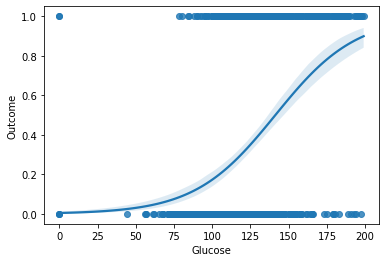

In [ ]:
sns.regplot(x='Glucose', y='Outcome', data=dataframe, logistic=True)

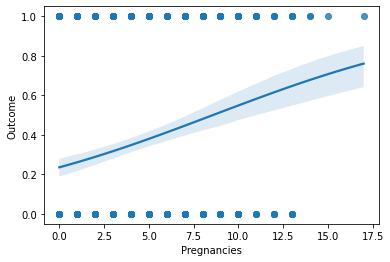

In [ ]:
sns.regplot(x='Pregnancies', y='Outcome', data=dataframe, logistic=True)

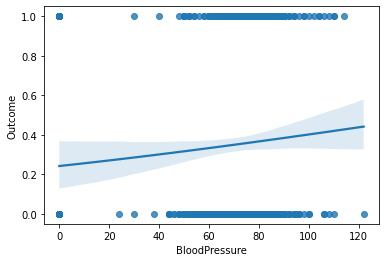

In [ ]:
sns.regplot(x='BloodPressure', y='Outcome', data=dataframe, logistic=True)

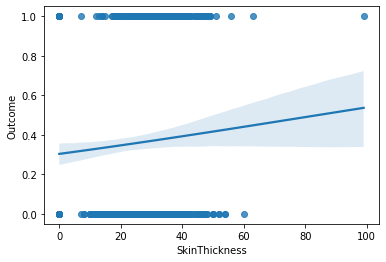

In [ ]:
sns.regplot(x='SkinThickness', y='Outcome', data=dataframe, logistic=True)

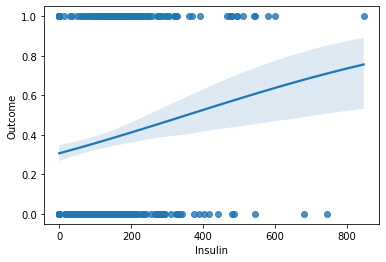

In [ ]:
sns.regplot(x='Insulin', y='Outcome', data=dataframe, logistic=True)

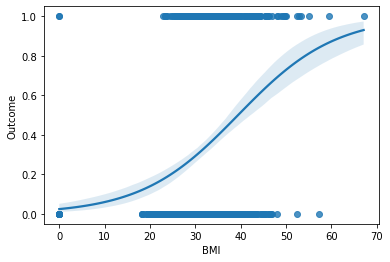

In [ ]:
sns.regplot(x='BMI', y='Outcome', data=dataframe, logistic=True)

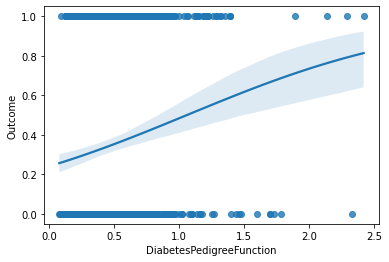

In [ ]:
sns.regplot(x='DiabetesPedigreeFunction', y='Outcome', data=dataframe, logistic=True)

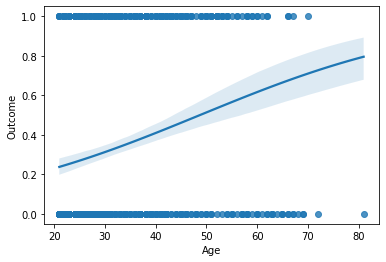

In [ ]:
sns.regplot(x='Age', y='Outcome', data=dataframe, logistic=True)

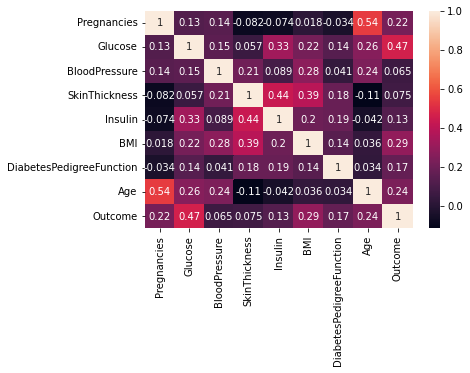

In [ ]:
corrMatrix = dataframe.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# MODELLING LOGISTIC REGRESSION (ELASTICNET, L1, L2)

In [ ]:
logRegElastic = LogisticRegression(penalty='elasticnet',max_iter=1000,solver='saga',l1_ratio=0.5)
logRegl1 = LogisticRegression(penalty='l1',max_iter=1000,solver='liblinear',l1_ratio=1)
logRegl2 = LogisticRegression(penalty='l2',max_iter=1000,solver='liblinear',l1_ratio=0)
logRegElastic.fit(X_train, y_train)
logRegl1.fit(X_train, y_train)
logRegl2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


LogisticRegression(l1_ratio=0, max_iter=1000, solver='liblinear')

In [ ]:
predict_elastic = logRegElastic.predict(X_test)
predict_logRegl1 = logRegl1.predict(X_test)
predict_logRegl2 = logRegl2.predict(X_test)

# CONFUSION MATRIX (ELASTICNET, L1, L2)

In [ ]:
cm_elastic = confusion_matrix(y_test, predict_elastic)
cm_l1 = confusion_matrix(y_test, predict_logRegl1)
cm_l2 = confusion_matrix(y_test, predict_logRegl2)

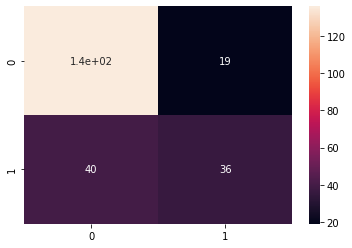

In [ ]:
sns.heatmap(cm_elastic, annot= True)

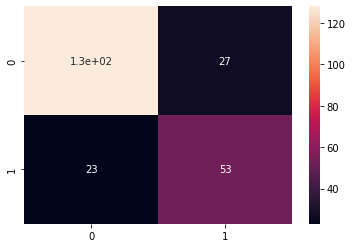

In [ ]:
sns.heatmap(cm_l1, annot= True)

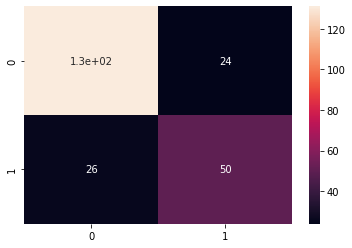

In [ ]:
sns.heatmap(cm_l2, annot= True)

# CLASSIFICATION REPORT (ELASTICNET, L1, L2)

In [ ]:
print(classification_report(y_test, predict_elastic))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       155
           1       0.65      0.47      0.55        76

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [ ]:
print(classification_report(y_test, predict_logRegl1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       155
           1       0.66      0.70      0.68        76

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.78      0.78       231



In [ ]:
print(classification_report(y_test, predict_logRegl2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       155
           1       0.68      0.66      0.67        76

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



# ROC (ELASTICNET, L1, L2)

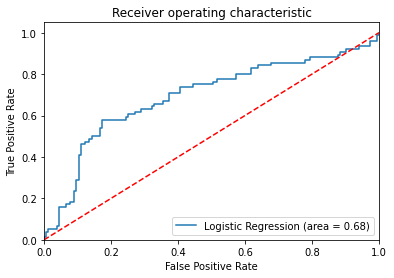

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegElastic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegElastic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

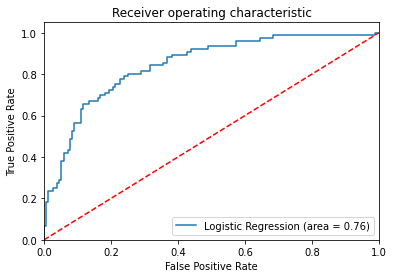

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegl1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegl1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

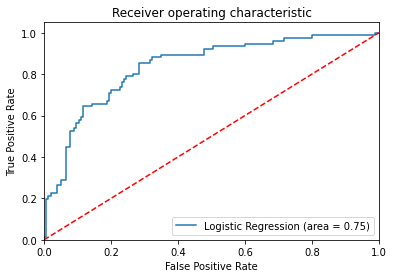

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegl2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegl2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The closer a curve is to the point (0, 1), the more accurate a predictor is. As a rule of thumb, an AUC above 0.85 means high classification accuracy, one between 0.75 and 0.85 moderate accuracy, and one less than 0.75 low accuracy (D' Agostino, Rodgers, & Mauck, 2018).

# TEST MODEL (LOGISTIC, L1, L2)

In [ ]:
logRegElastic.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
logRegl1.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
logRegl2.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
logRegElastic.predict([[1,85,66,29,0,26.6,0.351,31]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
logRegl1.predict([[1,85,66,29,0,26.6,0.351,31]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
logRegl2.predict([[1,85,66,29,0,26.6,0.351,31]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])